In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
student_performance = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
X = student_performance.data.features 
y = student_performance.data.targets 
  
# metadata 
print(student_performance.metadata) 
  
# variable information 
print(student_performance.variables) 

{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'published_in': 'Proceedings of 5th Annual Future Business Technology Conference', 'year'

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import numpy as np

In [62]:
file_path = "https://archive.ics.uci.edu/static/public/320/data.csv"
df = pd.read_csv(file_path, sep=',', header=None)

In [64]:
df.head()


,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
2,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
3,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
4,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14


In [65]:
# Assign the first row as column names
df.columns = df.iloc[0]
# Drop the duplicate header row
df = df.drop(0)
# Reset the index of the DataFrame
df = df.reset_index(drop=True)

In [66]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    object
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    object
 7   Fedu        649 non-null    object
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    object
 13  studytime   649 non-null    object
 14  failures    649 non-null    object
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [68]:
df.dtypes

0
school        object
sex           object
age           object
address       object
famsize       object
Pstatus       object
Medu          object
Fedu          object
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime    object
studytime     object
failures      object
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel        object
freetime      object
goout         object
Dalc          object
Walc          object
health        object
absences      object
G1            object
G2            object
G3            object
dtype: object

In [69]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object', name=0)

In [70]:
df['school'].replace(['GP', 'MS'], [0, 1], inplace=True)
df['sex'].replace(['F', 'M'], [0,1], inplace = True)
df['address'].replace(['U', 'R'], [0,1], inplace = True)
df['famsize'].replace(['GT3', 'LE3'], [0,1], inplace = True)
df['Pstatus'].replace(['A', 'T'], [0,1], inplace = True)
df['Mjob'].replace(['at_home', 'health', 'other', 'services', 'teacher'], [0,1,2,3,4], inplace = True)
df['Fjob'].replace(['at_home', 'health', 'other', 'services', 'teacher'], [0,1,2,3,4], inplace = True)
df['reason'].replace(['course', 'other', 'home', 'reputation'], [0,1,2,3,], inplace = True)
df['guardian'].replace(['mother', 'father', 'other'], [0,1,2], inplace = True)
df['schoolsup'].replace(['yes', 'no'], [0,1], inplace = True)
df['famsup'].replace(['no', 'yes'], [0,1], inplace = True)
df['paid'].replace(['no', 'yes'], [0,1], inplace = True)
df['activities'].replace(['no', 'yes'], [0,1], inplace = True)
df['nursery'].replace(['yes', 'no'], [0,1], inplace = True)
df['higher'].replace(['yes', 'no'], [0,1], inplace = True)
df['internet'].replace(['no', 'yes'], [0,1], inplace = True)
df['romantic'].replace(['no', 'yes'], [0,1], inplace = True)


In [76]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,0,0,4,4,0,4,...,4,3,4,1,1,3,4,0,11,11
1,0,0,17,0,0,1,1,1,0,2,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,0,1,1,1,1,0,2,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,0,0,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,0,0,1,3,3,2,2,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,1,0,1,2,3,3,2,...,5,4,2,1,2,5,4,10,11,10
645,1,0,18,0,1,1,3,1,4,3,...,4,3,4,1,1,1,4,15,15,16
646,1,0,18,0,0,1,1,1,2,2,...,1,1,1,1,1,5,6,11,12,9
647,1,1,17,0,1,1,3,1,3,3,...,2,4,5,3,4,2,6,10,10,10


In [71]:
df.describe()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.348228,0.409861,0.303544,0.295840,0.876733,1.941448,2.224961,1.231125,0.362096,0.895223,0.613251,0.060092,0.485362,0.197227,0.106317,0.767334,0.368259
std,0.476776,0.492187,0.460143,0.456771,0.328996,1.248317,0.863487,1.224323,0.598232,0.306502,0.487381,0.237841,0.500171,0.398212,0.308481,0.422857,0.482704
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [148]:
print("Hypothesis:") 
print("1. The amount of time spent studying correlates to the final grade")
print("2. The amount of free time and having a romantic relationship correlate to the final grade")

Hypothesis:
1. The amount of time spent studying correlates to the final grade
2. The amount of free time and having a romantic relationship correlate to the final grade


Text(0, 0.5, 'number of students')

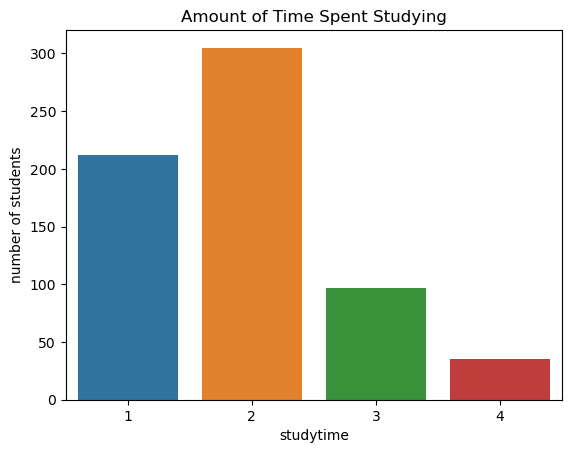

In [115]:
sns.countplot(x='studytime', data=df)
plt.title('Amount of Time Spent Studying')
plt.ylabel('number of students')

In [116]:
df["G3"] = pd.to_numeric(df['G3'])

In [117]:
df["studytime"] = pd.to_numeric(df["studytime"])

In [118]:
print(df.dtypes)

0
school         int64
sex            int64
age           object
address        int64
famsize        int64
Pstatus        int64
Medu          object
Fedu          object
Mjob           int64
Fjob           int64
reason         int64
guardian       int64
traveltime    object
studytime      int64
failures      object
schoolsup      int64
famsup         int64
paid           int64
activities     int64
nursery        int64
higher         int64
internet       int64
romantic       int64
famrel        object
freetime      object
goout         object
Dalc          object
Walc          object
health        object
absences      object
G1            object
G2            object
G3             int64
dtype: object


Text(0, 0.5, 'Final Grade')

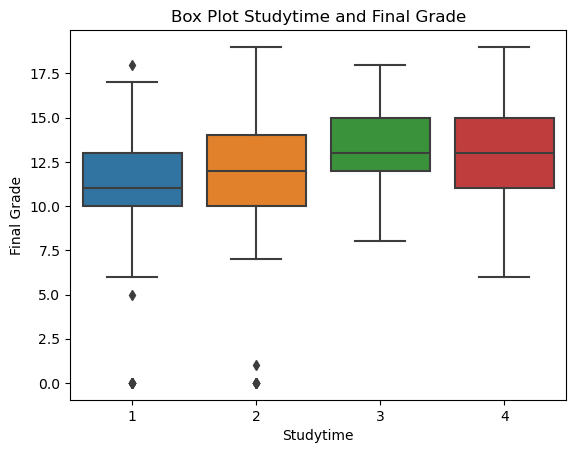

In [128]:
sns.boxplot(x='studytime', y='G3', data=df)
plt.title('Box Plot Studytime and Final Grade')
plt.xlabel('Studytime')
plt.ylabel('Final Grade')

In [141]:
df["goout"] = pd.to_numeric(df['goout'])

In [142]:
df["failures"] = pd.to_numeric(df['failures'])

In [143]:
print(df.dtypes)

0
school           int64
sex              int64
age             object
address          int64
famsize          int64
Pstatus          int64
Medu            object
Fedu            object
Mjob             int64
Fjob             int64
reason           int64
guardian         int64
traveltime      object
studytime        int64
failures         int64
schoolsup        int64
famsup           int64
paid             int64
activities       int64
nursery          int64
higher           int64
internet         int64
romantic      category
famrel          object
freetime         int64
goout            int64
Dalc            object
Walc            object
health          object
absences        object
G1              object
G2              object
G3               int64
dtype: object


In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

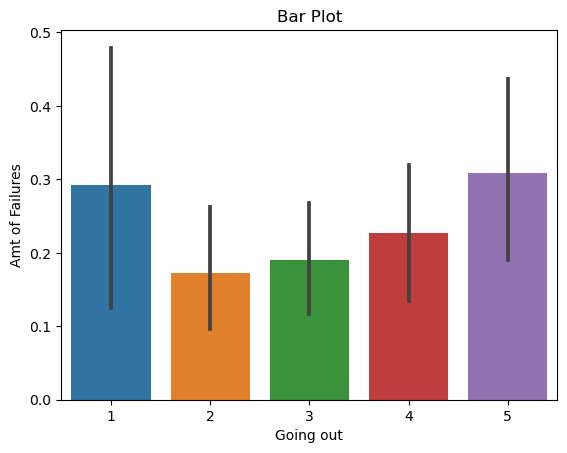

In [144]:
sns.barplot(x='goout', y='failures', data=df)
plt.title('Bar Plot')
plt.xlabel('Going out')
plt.ylabel('Amt of Failures')
plt.show()

In [147]:
print("CONCLUSION:")
print("There is a moderate correlation between the amount of time a student spends studying and the their final grade.")
print("There was no correlation found between how frequent a student goes out with their friends and the amount of failures they have.")

CONCLUSION:
There is a moderate correlation between the amount of time a student spends studying and the their final grade.
There was no correlation found between how frequent a student goes out with their friends and the amount of failures they have.
